<a href="https://colab.research.google.com/github/DerrickKuria/Practice--Machine--Learning/blob/master/Ridge_and_Lasso_Regression_implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#We are going to load a datset from Scikit learn Library sklearn
from sklearn.datasets import load_boston

## Import dependencies

In [0]:
#Numpy is a numerical Library in ptyhon used for dimmensional arrays
import numpy as np
#Pandas is used for Data Manipulation
import pandas as pd
#Matplot is a library used for plotting graphs
import matplotlib.pyplot as plt


In [0]:
#Load the dataset
df = load_boston()

## Preview the Data

In [47]:
#Observe the data
df

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

The data in between the array. That is the independent variable.
The data from Target downwards , thats the Dependent variable. The feature naes are  the column names.

The data is not arranged hence we will put it in a Dataframe

In [0]:
#Transform the Data from the dataset to the Dataframe

In [0]:
#We can do it this  way:
#1. Import using the Dot Notation where we will have the X columns and store the feature Names here and
# Y column(Store the Target data there) put in different dataframes as Follows.

#It called the Dot notation because its df.data for X values, 
#df.features_names for Column names and df.target for Dependent variables.
#This is shown below.

In [50]:
#Our dataframe for dependent variables will be called dataset
dataset = pd.DataFrame(df.data)
#Preview the first 5 entries of the data
print(dataset.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [0]:
#Assign feature names(columns) to all dependent variables
dataset.columns = df.feature_names

In [52]:
#Preview our data(The dependent variables) again with the feature names now
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
#WE check the summaries of the data.
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [54]:
#Dependent feature
df.target.shape

(506,)

In [0]:
#We will create a new column and call it Price and put our target variable(Dependent/y variables) here.
dataset['Price'] = df.target

In [56]:
#We will preview our data again to see if the changes have taken place
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Put Data in atrributes and labels

In [0]:
#This involves distributing our data in independent and dependent features.
X = dataset.iloc[:,:-1] #Independent features. 
#The negative 1 means taking all datasets except the last one
y=  dataset.iloc[:,-1]
#This means , picking the last one only.

## Linear Regression

In [0]:
#We will first import the Linear Regression as fllows:
from sklearn.linear_model import LinearRegression

In [0]:
#We will import Cross Vsl score thst is used to do cross validation
#We will specify the number of validations afterwards
from sklearn.model_selection import cross_val_score


In [0]:
lin_regressor = LinearRegression()
#our Cross validations will be 5
#All the mean Squared errors, we will put them as a negative value.
mse = cross_val_score(lin_regressor, X,y , scoring ='neg_mean_squared_error', cv =5)
#The more the value is nearer to zero , the more the model becomes right.

In [61]:
#This is the mean of the 5 cross validations(5 experiments)
mean_mse = np.mean(mse)
print(mean_mse)

-37.131807467699055


Our value is a little far off from zero , thats why we will try another regression model.

Use a metric to check how our model accuracy. We will use MSE(Mean Squared error)

In [81]:
#Check the model performance / accuracy using Mean Squared error(using  Numpy)
print(np.mean((y_pred - y_test)**2))

27.195965766883404


In [82]:
#Check the model performance / accuracy using Mean Squared error(using  Numpy)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

27.195965766883408


## Ridge Regression

We will need to find out a value called Lambda which is also found out through cros validation

In [0]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV

In [63]:
#We then initialise the ridge object
ridge = Ridge()
#We will provide different values for Alpha which should be greater than 0.
parameters = {'alpha':[1e-15,1e-10,1e-3,1e-2, 1 ,5, 10, 20, 30,35,40, 45,50,55,100, 125]}
#Using GridSearchCV we will find out which alpha best suites our data.
ridge_regressor = GridSearchCV(ridge, parameters, scoring= 'neg_mean_squared_error',cv =5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 1, 5, 10, 20, 30,
                                   35, 40, 45, 50, 55, 100, 125]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [64]:
#Best Params helps us identify which is the best ALpha value
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 125}
-29.78490089976164


Our Alpha is still far from zero hence we will use another regression same to this one and see our result. We hope it will be nearer to Zero

## LASSO REGRESSION

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#Initialise Lasso
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,100,125]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring= 'neg_mean_squared_error', cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2542.94634

{'alpha': 1}
-35.531580220694856


In [66]:
#Print the independent variables.
names = dataset.drop('Price', axis =1).columns
print(names)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [0]:
#We initialise ur regressor using the Alpha value as the one we got in the question
lasso = Lasso(alpha =1)
#We then fit our model
#The coef_ is that it can use each of the coeffiecients for each of its targets
lasso_coef = lasso.fit(X,y).coef_



We want to find which is the most important feature out of them all.

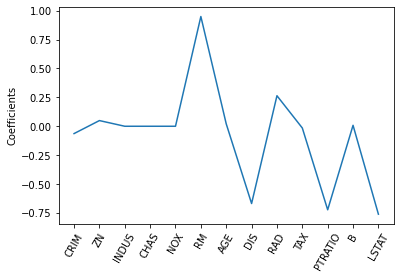

In [68]:
_= plt.plot(range(len(names)),lasso_coef)
_= plt.xticks(range(len(names)),names, rotation =60)
_= plt.ylabel("Coefficients")
plt.show()

Baes on this finding we find that the Number of roms is the most important feature in the price of a house

In [0]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.3 , random_state = 0)

In [71]:
#Train the model with our training model
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

In [73]:
#print the coefficients/ weights for each feature/column of our model
print(reg.coef_)


[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]


In [74]:
#Print ur prediction on out test data
y_pred = reg.predict(X_test)
print(y_pred)

[24.9357079  23.75163164 29.32638296 11.97534566 21.37272478 19.19148525
 20.5717479  21.21154015 19.04572003 20.35463238  5.44119126 16.93688709
 17.15482272  5.3928209  40.20270696 32.31327348 22.46213268 36.50124666
 31.03737014 23.17124551 24.74815321 24.49939403 20.6595791  30.4547583
 22.32487164 10.18932894 17.44286422 18.26103077 35.63299326 20.81960303
 18.27218007 17.72047628 19.33772473 23.62254823 28.97766856 19.45036239
 11.13170639 24.81843595 18.05294835 15.59712226 26.21043403 20.81140432
 22.17349382 15.48367365 22.62261604 24.88561528 19.74754478 23.0465628
  9.84579105 24.36378793 21.47849008 17.62118176 24.39160873 29.95102691
 13.57219422 21.53645439 20.53306273 15.03433182 14.3232289  22.11929299
 17.07321915 21.54141094 32.96766968 31.371599   17.7860591  32.75069556
 18.74795323 19.21428022 19.41970047 23.08087809 22.87732816 24.06399098
 30.52824406 28.71453508 25.90763165  5.17596718 36.8709072  23.76983849
 27.26064379 19.25849042 28.41860517 19.3008798  18.9

In [75]:
print(y_test)

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
4      36.2
428    11.0
385     7.2
308    22.8
5      28.7
Name: Price, Length: 152, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


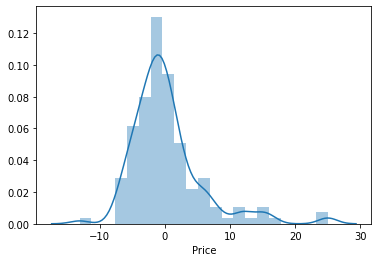

In [83]:
#Plot using seaborn
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

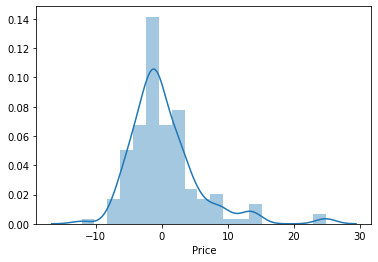

In [84]:
sns.distplot(y_test-prediction_ridge)